In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
 # Create our session (link) from Python to the DB
session = Session(engine)

One year ago from today 2017-04-21


<IPython.core.display.Javascript object>


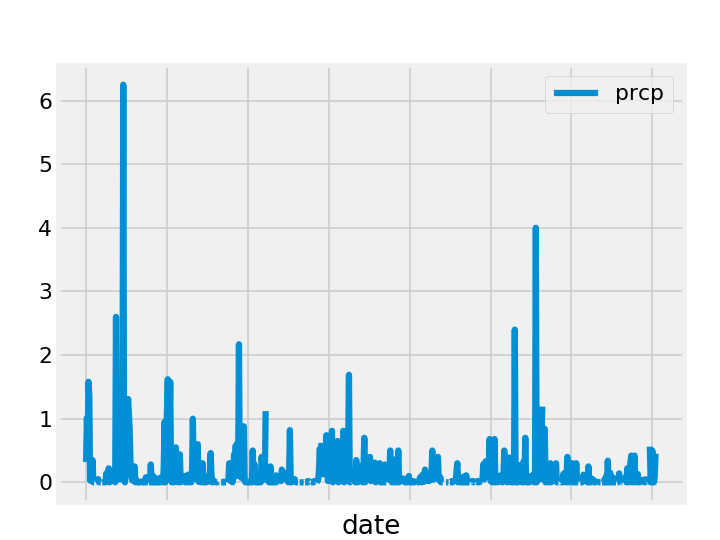

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results    
# Calculate the date 1 year ago from today
last_year = dt.date.today() - dt.timedelta(500)
print("One year ago from today " + str(last_year))

rainquery = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year).order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date
raindf = pd.DataFrame(rainquery)

raindf.set_index("date", inplace=True)
raindf.plot()